# Student performance analysis & Prediction

Student performance analysis involves evaluating and measuring students' academic progress and achievement. 

This project understands how the student’s performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, and Lunch and Test preparation course.

**Why is it important to analyze student performance?**

Analyzing student performance is important because it helps educators understand how well students are learning, identify areas for improvement, personalize instruction, refine the curriculum, provide feedback to students, ensure accountability, intervene early when needed, and involve parents in their child's education.

## Importing libraries

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
import pickle
import warnings
warnings.filterwarnings("ignore")

## Load the Dataset

Dataset Description: 
    Marks secured by the students in high school
Students from the United States.

In [256]:
df=pd.read_csv("StudentsPerformance.csv")

In [257]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [258]:
#Dimension
df.shape

(1000, 8)

In [ ]:
#Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [260]:
#Statistical Description
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


* All means are fairly similar to one another, falling between 66 and 68.05.
* The range of all standard deviations, between 14.6 and 15.19, is also narrow.
* While there is a minimum score of 0 for math, the minimums for writing and reading are substantially higher at 10 and 17, respectively.

In [261]:
#Attributes
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

#### Check Missing Values

In [262]:
missing_values = df.isnull().sum()

print("Missing Values:")
print(missing_values)


Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


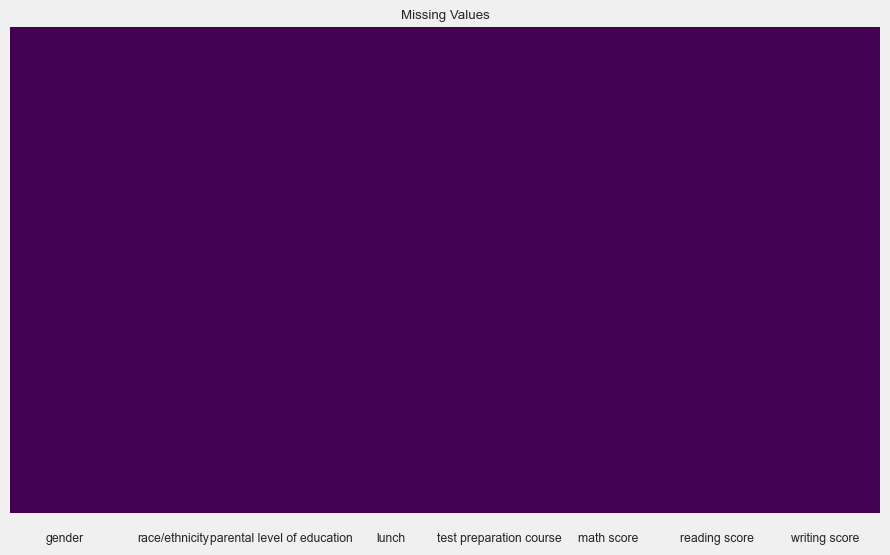

In [263]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values')
plt.show()

No Missing Value

#### Check Duplicates

In [264]:
df.duplicated().sum()

0

There are no duplicates values in the dataset.

#### Check the Number of Unique Values in Each Column

In [265]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [266]:
print("Categories in 'gender' variable:  ",end=" ")
print(df["gender"].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df["race/ethnicity"].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(df["parental level of education"].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df["lunch"].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(df["test preparation course"].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


### Value counts

In [267]:
df["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

* Most of them are group C

In [268]:
df["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

* More no of Female Students

In [269]:
df["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

* More no of students did not completed the course

In [270]:
df["lunch"].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

* More no of students took the standard lunch

In [271]:
df["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

* Very Few Parents hold a master degree

## Data Preprocessing

### separating the numerical and categorical features and count the feature values.

In [272]:
#define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != "object"] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == "object"] 

print("We have {} numerical features: {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


For a particular course, the total marks is 100. So let's set passmark is 35 marks.

In [273]:
#initializing the passmarks
passmark=35

In [274]:
#Creating relevant columns
df['Percentage'] = (df['math score']+df['reading score']+df['writing score'])/3

In [275]:
#Grading System
def Grade(Percentage):
    if (Percentage >= 95):return 'O'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'
    
df["grade"] = df.apply(lambda x : Grade(x["Percentage"]), axis=1)

In [276]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,B
6,female,group B,some college,standard,completed,88,95,92,91.666667,A
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,F
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,C
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,E


In [277]:
df["grade"].value_counts()

C    258
B    255
D    188
A    157
E     86
F     34
O     22
Name: grade, dtype: int64

* Most of the student got grade C & B

In [278]:
#Statistical Description
df.describe()

,math score,reading score,writing score,Percentage
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


* Average of Percentage Score is 67%

In [279]:
reading_full = df[df['reading score'] == 100]['Percentage'].count()
writing_full = df[df['writing score'] == 100]['Percentage'].count()
math_full = df[df['math score'] == 100]['Percentage'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [280]:
reading_less_20 = df[df['reading score'] <= 20]['Percentage'].count()
writing_less_20 = df[df['writing score'] <= 20]['Percentage'].count()
math_less_20 = df[df['math score'] <= 20]['Percentage'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Checking outliers

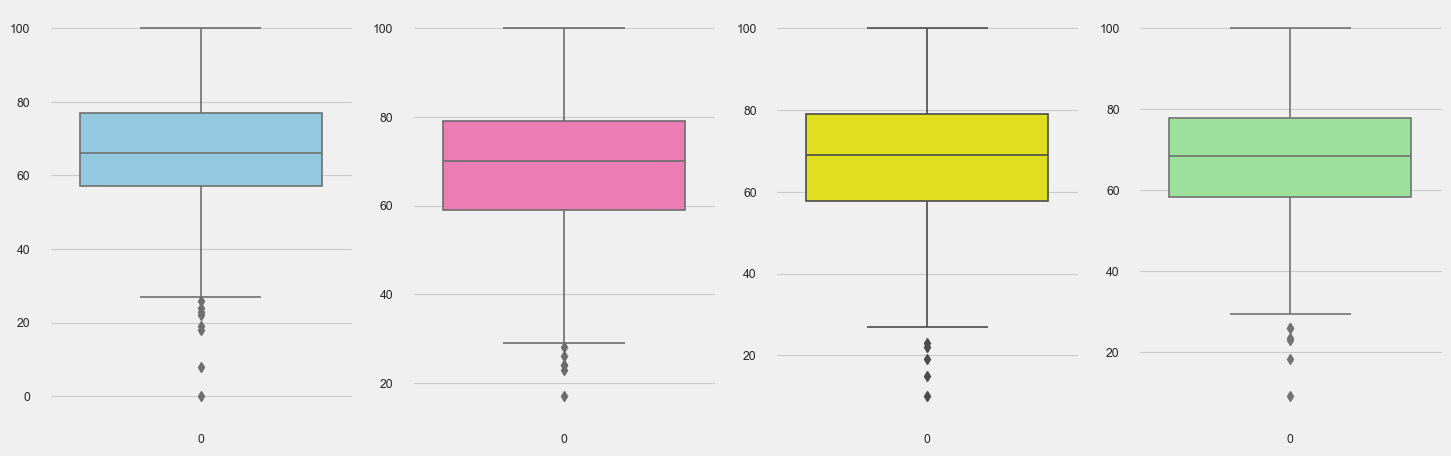

In [281]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Percentage'],color='lightgreen')
plt.show()

* Outlier is there

## Univariate Analysis

In [282]:
sns.set(style='darkgrid')

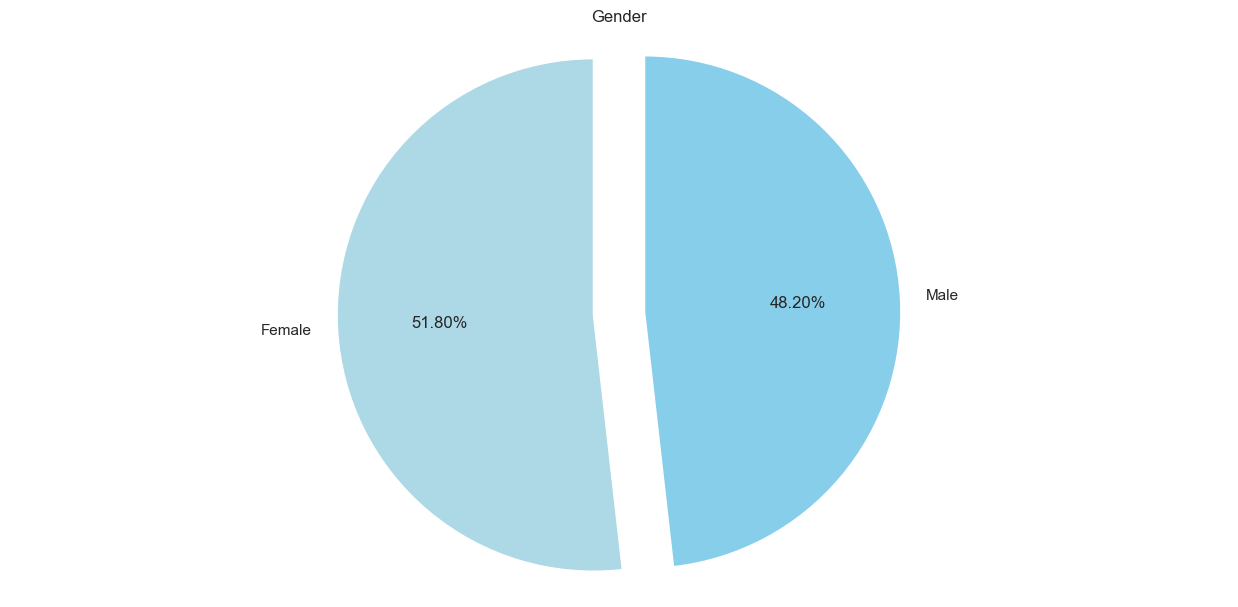

In [283]:
plt.figure(figsize=(14, 7))
labels=['Female', 'Male']
plt.pie(df['gender'].value_counts(), labels=labels, explode=[0.1, 0.1],
        autopct='%1.2f%%', colors=['#ADD8E6', '#87CEEB'], startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

* Out of the total number of students, 51.89% are females while 48.20% are males.

### Distribution Plot

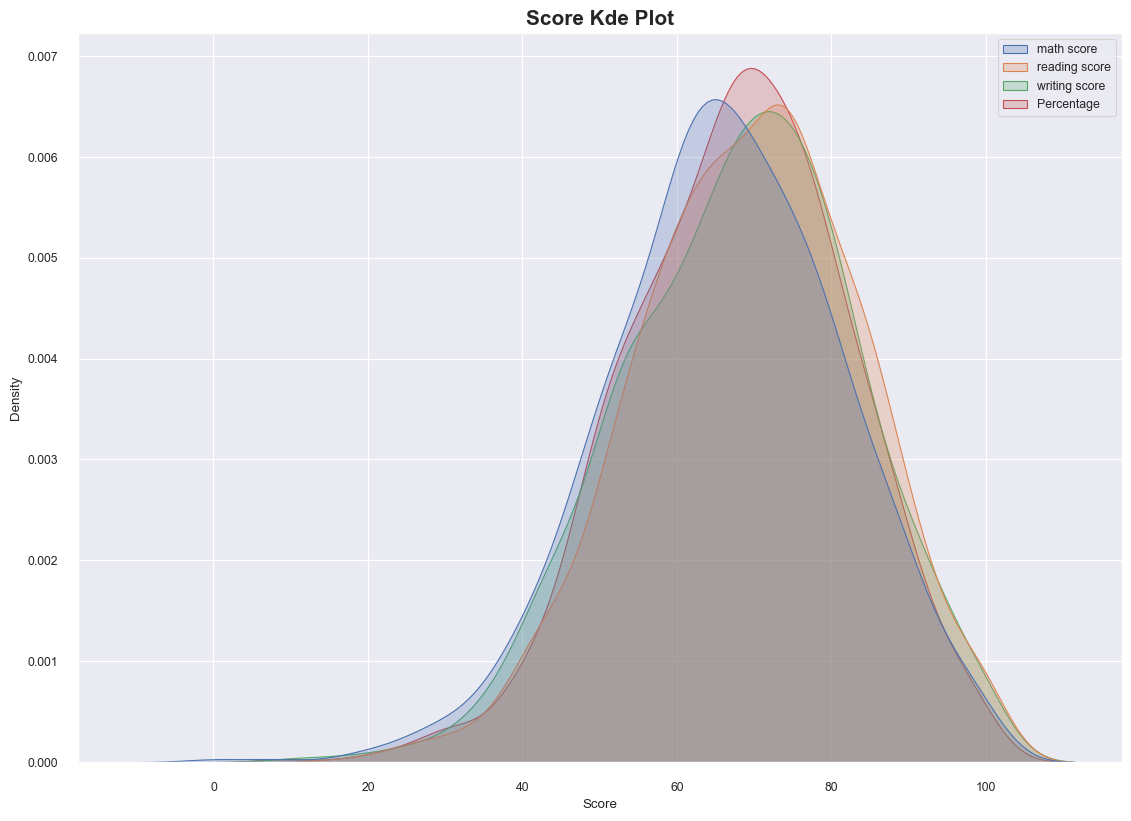

In [284]:
sns.set_context("paper",font_scale=1)
sns.kdeplot(data=df,shade = True)
plt.xlabel('Score')
plt.title('Score Kde Plot', fontsize=15, fontweight='bold')
plt.show()

### Parental Education

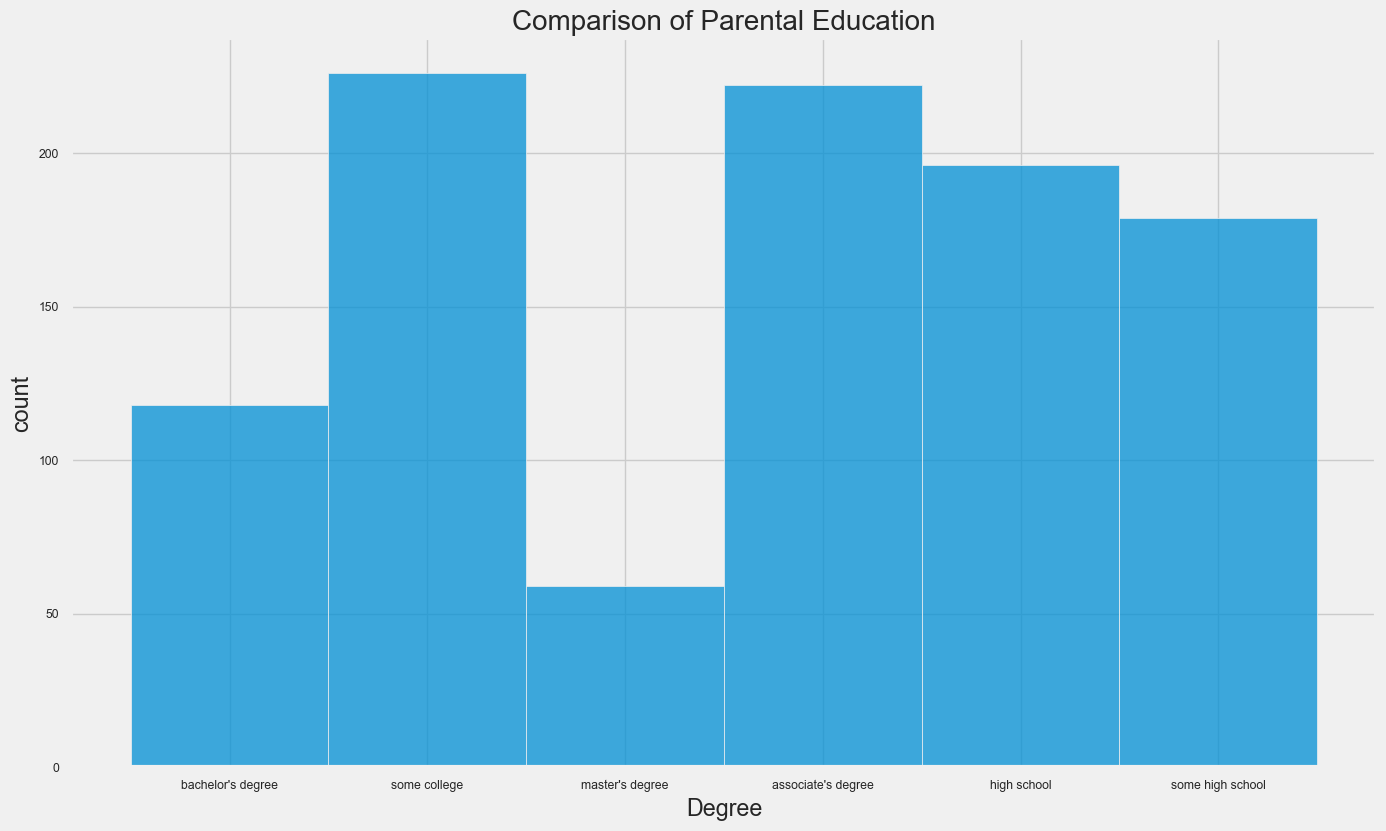

In [285]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.histplot(df["parental level of education"], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

* Largest number of parents are from college.

### Race/ethnicity

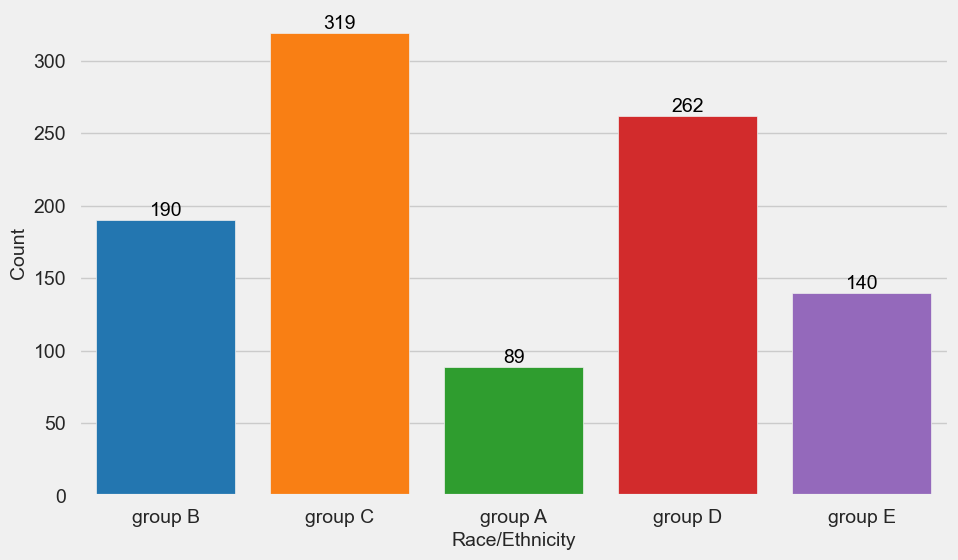

In [286]:
# Define a color palette for the countplot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the countplot of the 'race/ethnicity' column and add labels to the bars
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df['race/ethnicity'], data=df, palette=colors, saturation=0.95)
for container in ax.containers:
    ax.bar_label(container, color='black', size=14)

# Set font size of x-axis and y-axis labels and tick labels
ax.set_xlabel('Race/Ethnicity', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(labelsize=14)

# Display the plot
plt.show()


* Most of the student belonging from group C /group D.
* Lowest number of students belong to group A.

### Test preparation course

([<matplotlib.patches.Wedge at 0x13a231f5ad0>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'None'),
  Text(0.4746018041084478, -0.9923472817199666, 'Completed')])

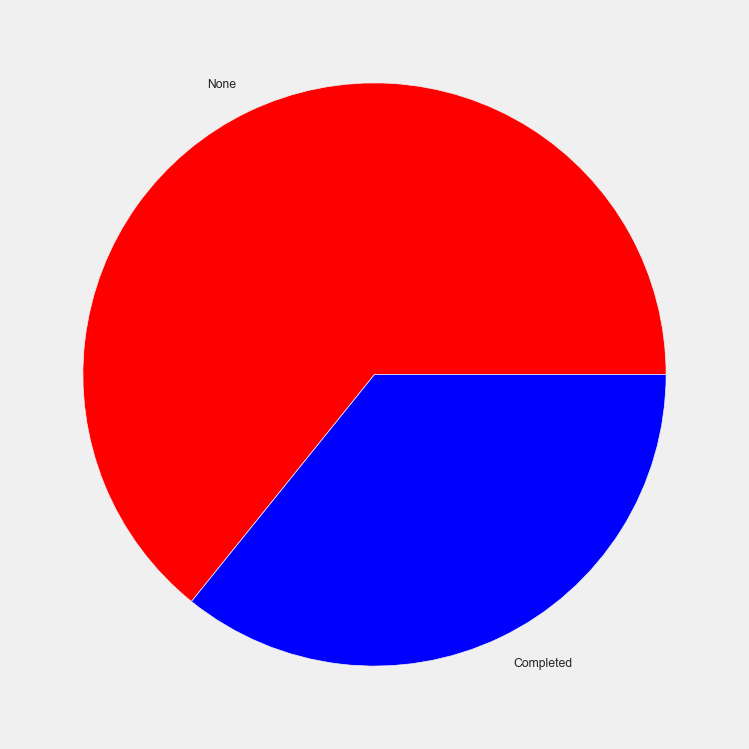

In [287]:
labels=['None','Completed']
colors=['red','blue']
plt.pie(df['test preparation course'].value_counts(),labels=labels,colors=colors)

### Lunch

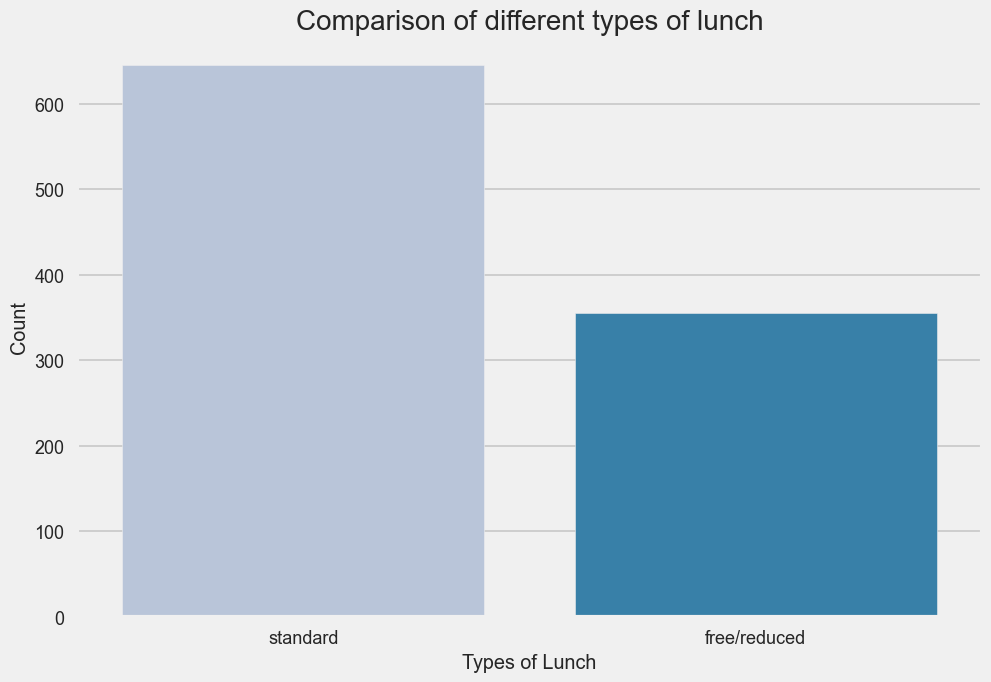

In [288]:

plt.rcParams['figure.figsize'] = (15, 9)

plt.style.use('seaborn-talk')

# Plot the count of each category
sns.countplot(data=df, x='lunch', palette='PuBu')

plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()

### Grade

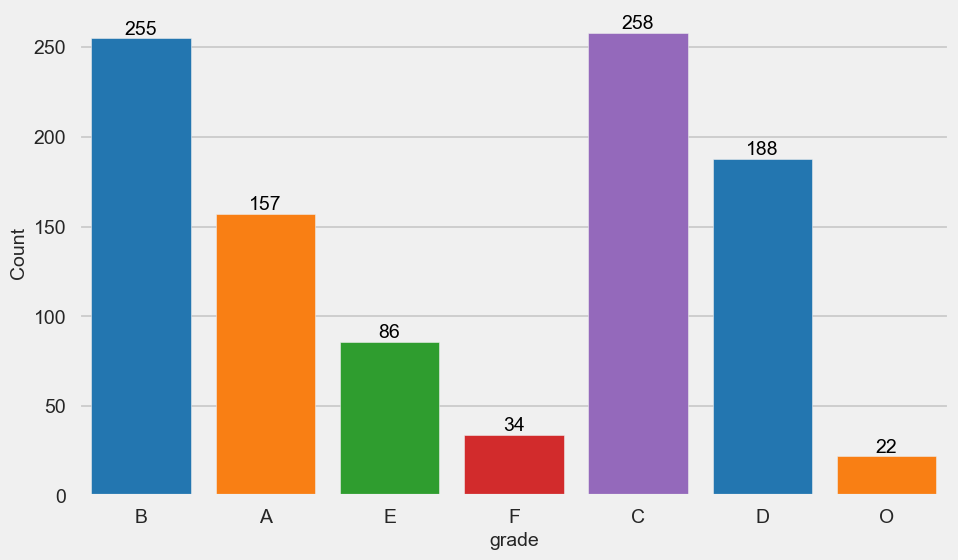

In [202]:
# Define a color palette for the countplot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the countplot of the 'grade' column and add labels to the bars
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df['grade'], data=df, palette=colors, saturation=0.95)
for container in ax.containers:
    ax.bar_label(container, color='black', size=14)

# Set font size of x-axis and y-axis labels and tick labels
ax.set_xlabel('grade', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(labelsize=14)

# Display the plot
plt.show()

* Most of the students got grade B and C

## Bivariate Analysis

### Percentage and Gender

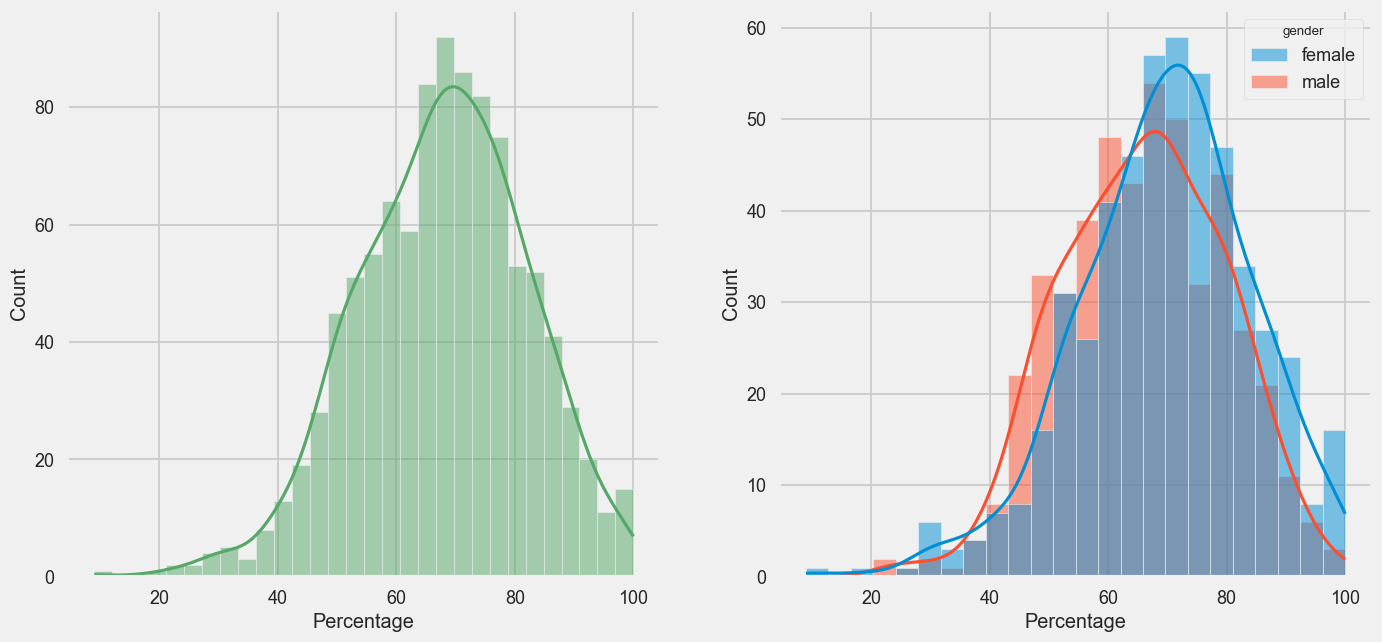

In [203]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Percentage',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Percentage',kde=True,hue='gender')
plt.show()

### Grade Distribution w.r.t Gender

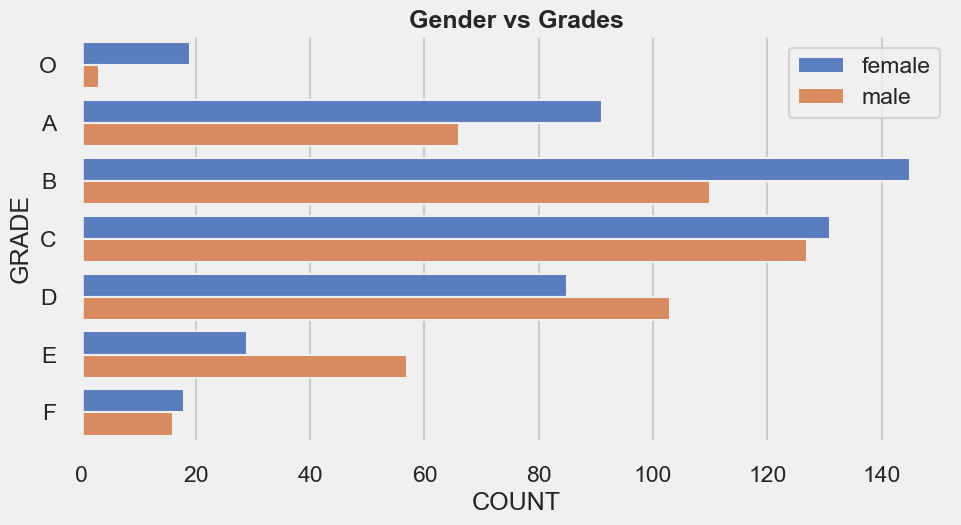

In [204]:
plt.figure(figsize=(10,5))
sns.set_context("talk",font_scale=1)
sns.set_palette("muted")
ax = sns.countplot(y="grade", hue="gender", data=df, order=["O","A","B","C","D","E","F"])
ax.legend(loc='upper right',frameon=True)
plt.title('Gender vs Grades', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='GRADE')
plt.show()

* In O,A,B Female has higher count

In [205]:
df[df['grade']=='F'].groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
gender,,,,,,,,,
female,18,18,18,18,18,18,18,18,18
male,16,16,16,16,16,16,16,16,16


* No of Male and Female who got grade F is same

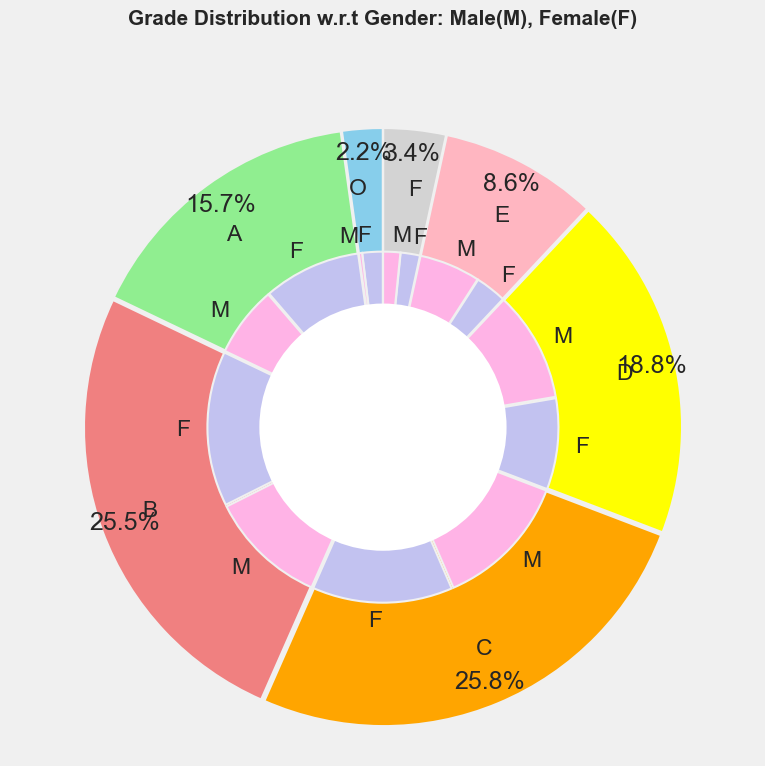

In [206]:
plt.figure(figsize=(8, 8))

# Data for grade distribution
labels = ["O", "A", "B", "C", "D", "E", "F"]
values = [22, 157, 255, 258, 188, 86, 34]
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1) 
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'yellow', 'lightpink', 'lightgrey']

# Data for gender distribution
labels_gender = ["F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
sizes_gender = [19, 3, 91, 66, 145, 110, 131, 127, 85, 103, 29, 57, 18, 16]
explode_gender = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
colors_gender = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']

# Plot
plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=0.92, labeldistance=0.80, colors=colors, startangle=90, frame=True, explode=explode, radius=12)
plt.pie(sizes_gender, labels=labels_gender, colors=colors_gender, startangle=90, explode=explode_gender, radius=7)

# Draw circle
centre_circle = plt.Circle((0,0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Grade Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, fontweight='bold', y=1.1)

# Show plot 
plt.axis('equal')
plt.tight_layout()
plt.show()


* The majority of students who earned an O grade were female.
* Majority of students received B grade followed by C.
* More female students received A and B Grade relative to male students.
* More number of boys received D and E grade.
* Almost similar number of both, male and female, got F grade.

### Race And Gender

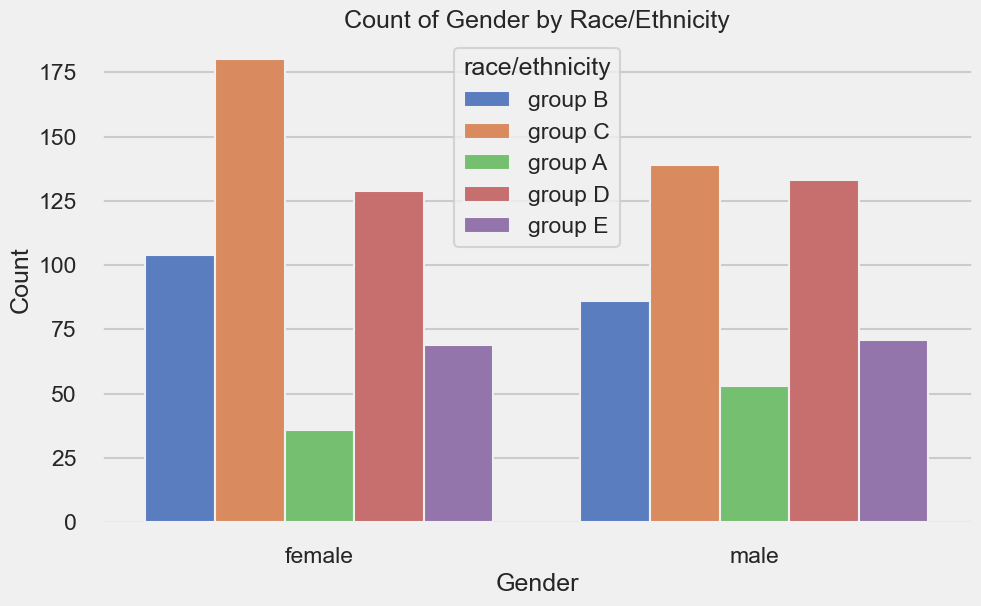

In [208]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='race/ethnicity', data=df)
plt.title('Count of Gender by Race/Ethnicity')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

* more females(Group C)

### Mathematics and Writing score

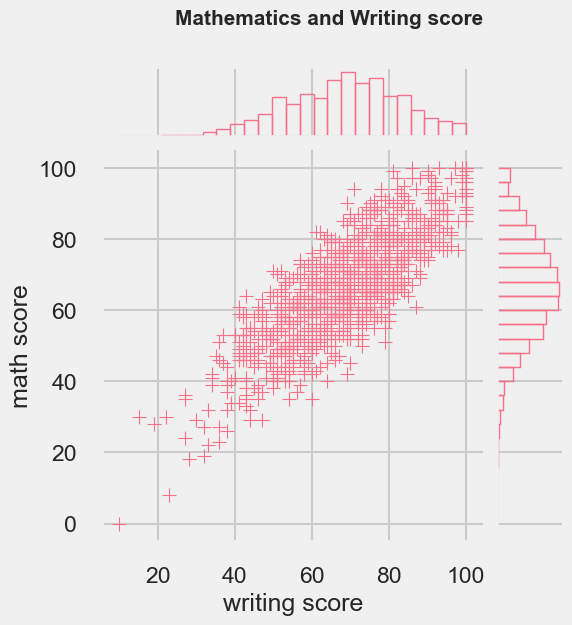

In [209]:
sns.set_palette("husl", 9)
sns.jointplot(
    data=df, x="writing score", y="math score",
    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),
)
plt.title('Mathematics and Writing score', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

* Most students fall between the range of 40 to 85 marks in both the courses, mathematics and writing.

### Mathematics and Reading  score

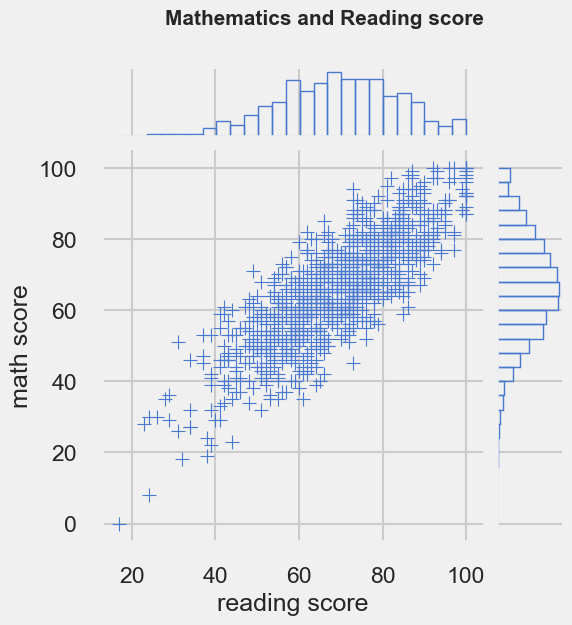

In [210]:
sns.set_palette("muted", 9)
sns.jointplot(
    data=df, x="reading score", y="math score",
    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),
)
plt.title('Mathematics and Reading score', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

* Most students fall between the range of 40 to 85 marks in both the courses, mathematics and reading.

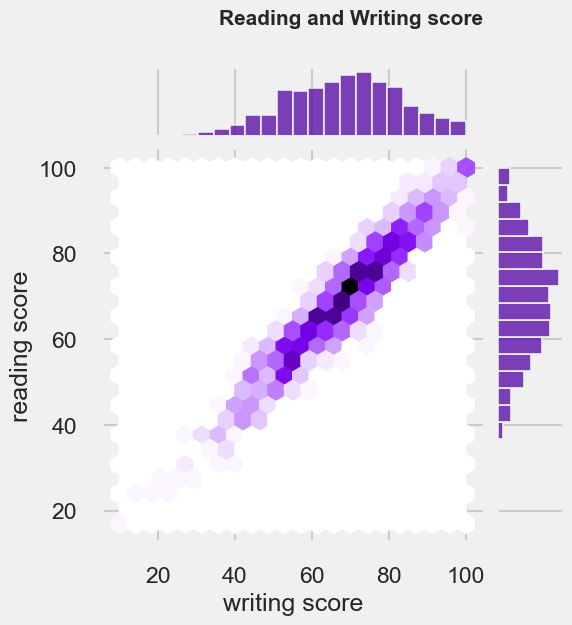

In [211]:
sns.set_palette("plasma")
sns.jointplot(data=df, x="writing score", y="reading score", kind="hex")
plt.title('Reading and Writing score', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

* The average score in both courses, reading and writing, is around 70.

### Percentage vs Scores

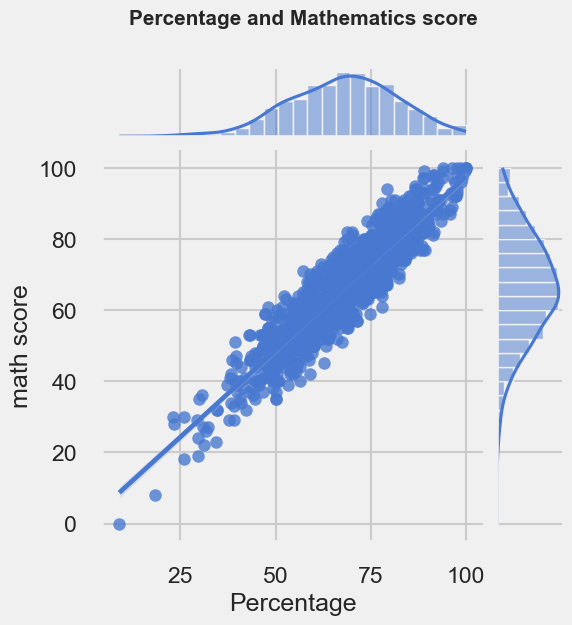

In [212]:
sns.set_palette("muted")
sns.jointplot(data=df, x="Percentage", y="math score", kind="reg")
plt.title('Percentage and Mathematics score ', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

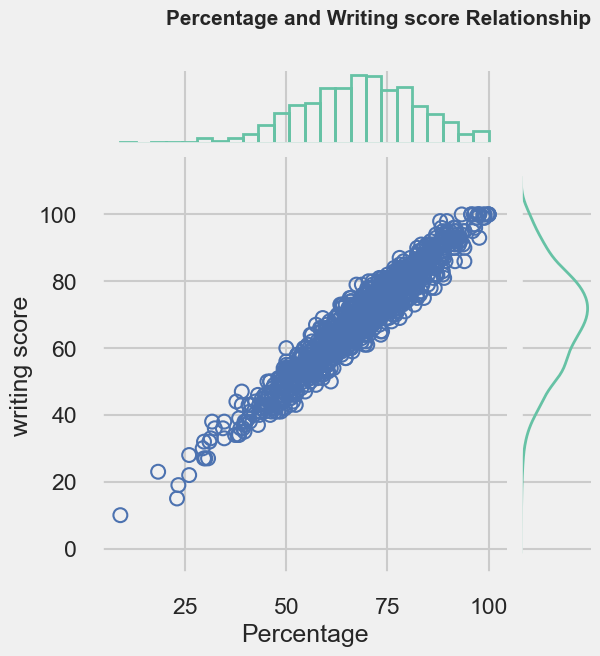

In [213]:
sns.set_palette("Set2")
g = sns.JointGrid()
x, y = df["Percentage"], df["writing score"]
sns.scatterplot(x=x, y=y, ec="b", fc="none", s=100, linewidth=1.5, ax=g.ax_joint)
sns.histplot(x=x, fill=False, linewidth=2, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y)
plt.title('Percentage and Writing score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

* most student have scored in the range of 60 to 80 which is constituting to the overall percentage as well.

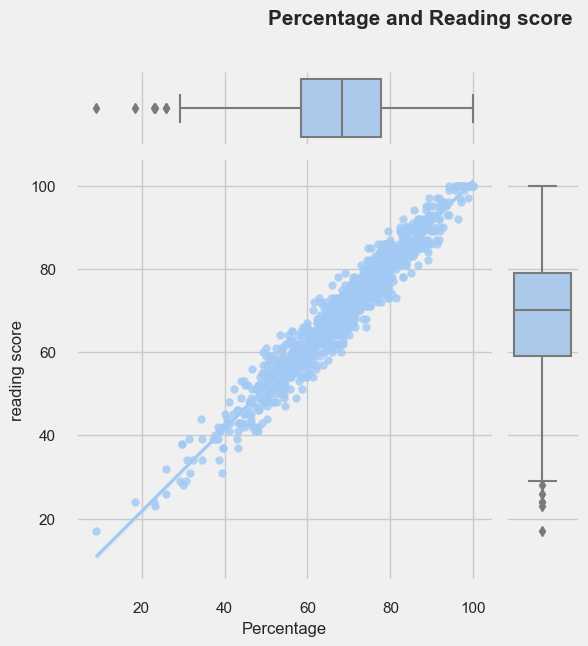

In [214]:
sns.set_context("notebook")
sns.set_palette("pastel")
g = sns.JointGrid(data=df, x="Percentage", y="reading score")
g.plot(sns.regplot, sns.boxplot)
plt.title('Percentage and Reading score ', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

* most students have a good reading score, except a few.

### Percentage Distribution w.r.t. Gender

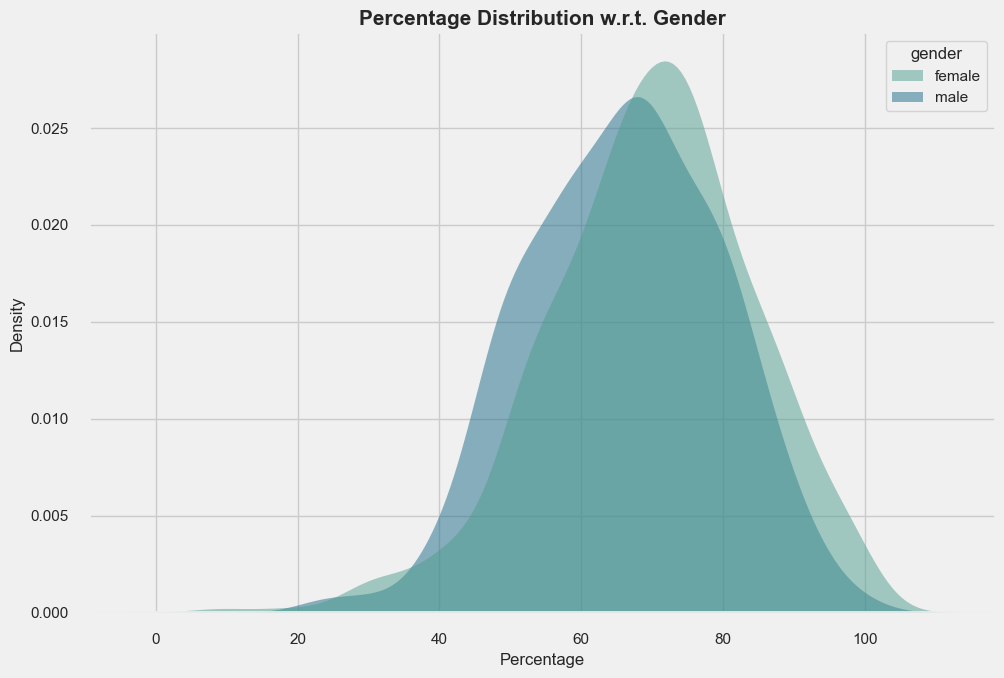

In [215]:
sns.set_context("notebook",font_scale=1)

sns.kdeplot(
   data=df, x="Percentage", hue="gender",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.title('Percentage Distribution w.r.t. Gender',fontsize=15, fontweight='bold')

plt.show()

* female students have performed exceptionally well!

### Percentage vs Test Preparation

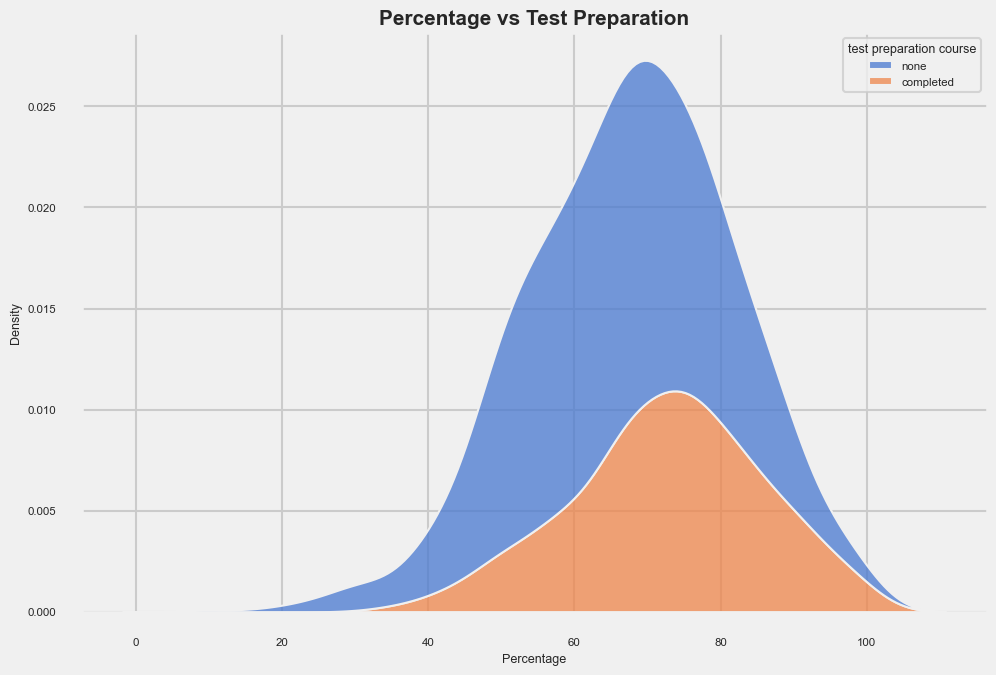

In [216]:
sns.set_context("talk",font_scale=0.5)
sns.set_palette("muted")
sns.kdeplot(data=df, x="Percentage", hue="test preparation course", multiple="stack")
plt.title('Percentage vs Test Preparation',fontsize=15, fontweight='bold')

plt.show()

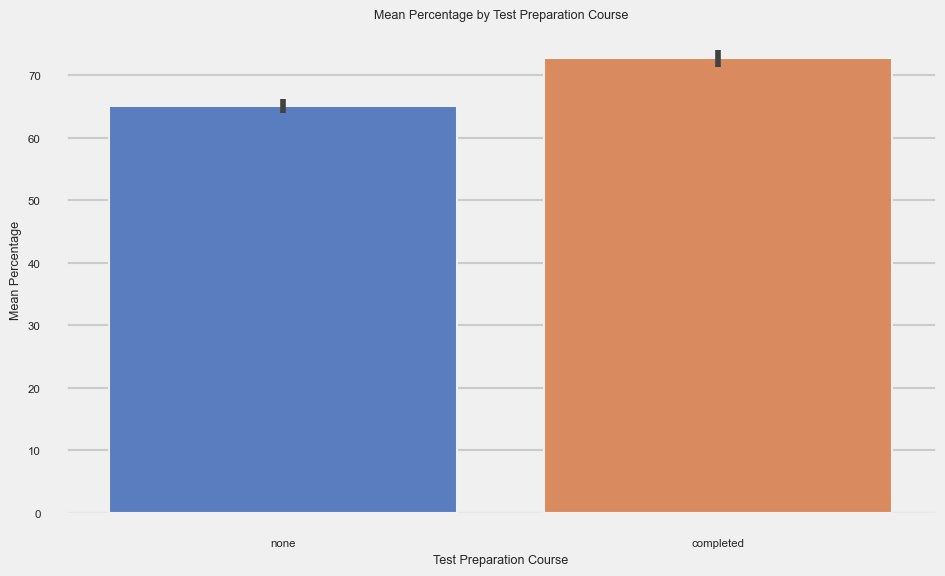

In [218]:
plt.figure(figsize=(10, 6))
sns.barplot(x='test preparation course', y='Percentage', data=df)
plt.title('Mean Percentage by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Mean Percentage')
plt.show()

### Percentage vs Lunch 

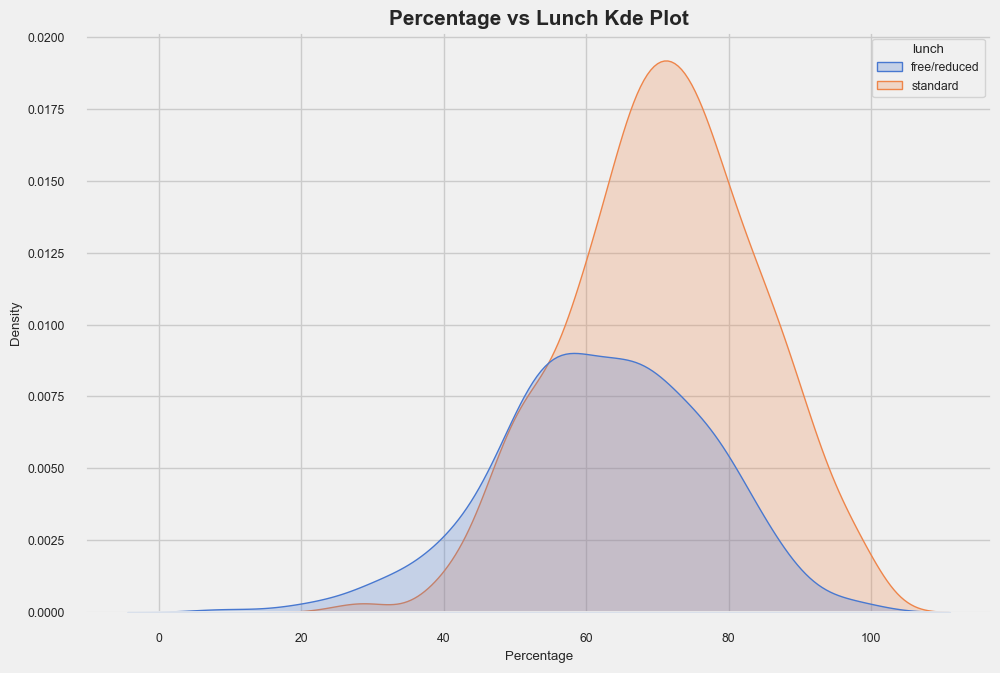

In [219]:
sns.set_context("notebook",font_scale=0.8)
sns.kdeplot(data=df, x="Percentage", hue="lunch", multiple="layer",fill=True)
plt.xlabel('Percentage')
plt.title('Percentage vs Lunch Kde Plot',fontsize=15, fontweight='bold')

plt.show()

### Parental level of education, Test Prepration course and Lunch

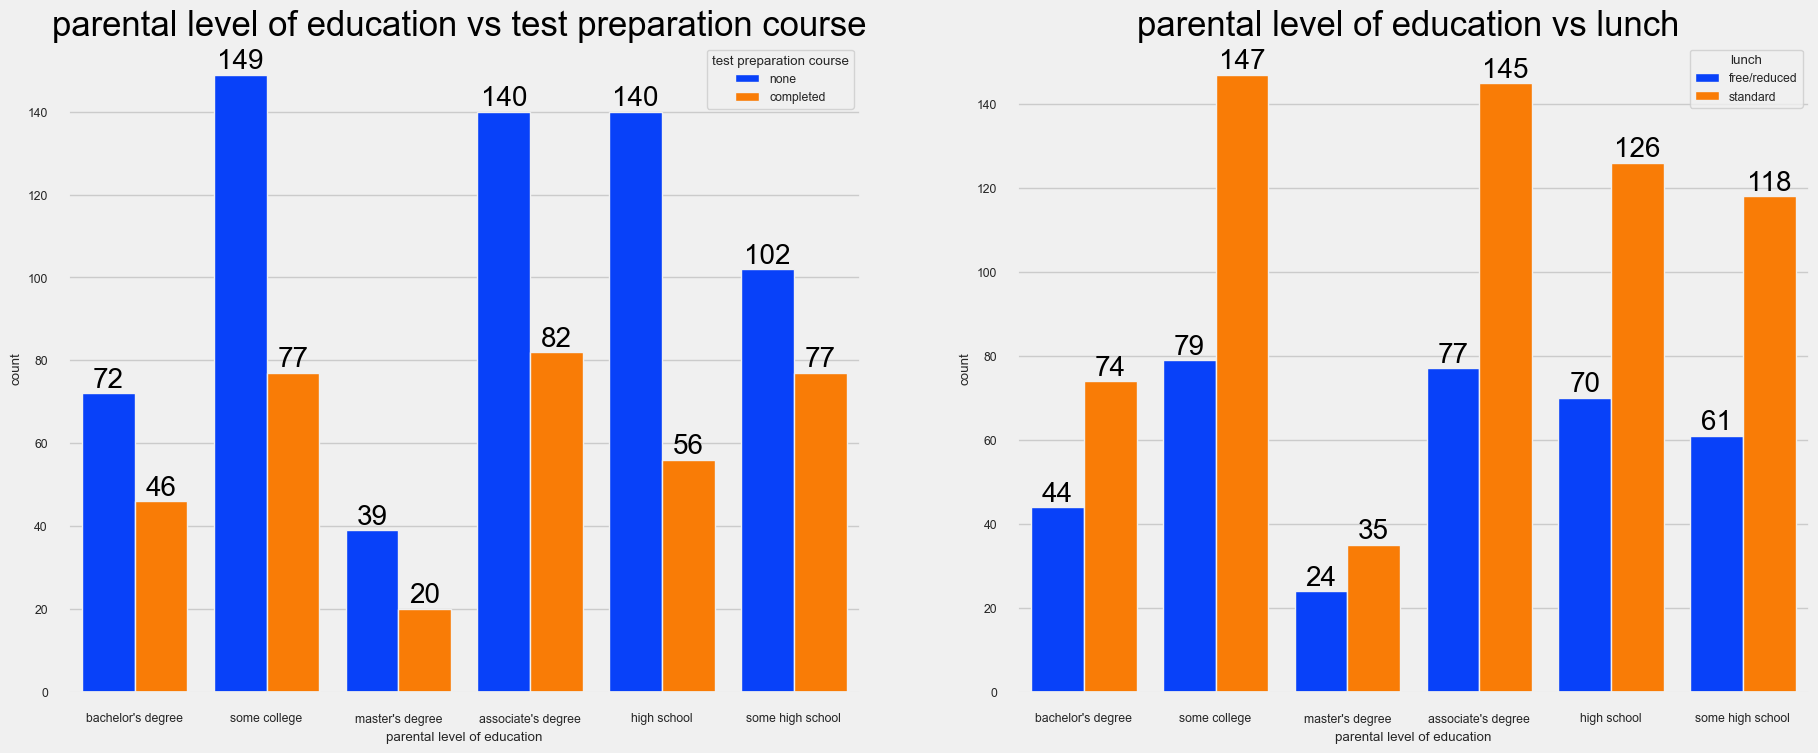

In [222]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('parental level of education vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
ax[1].set_title('parental level of education vs lunch ',color='black',size=25)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

### Percentage vs Parental Level Of Education

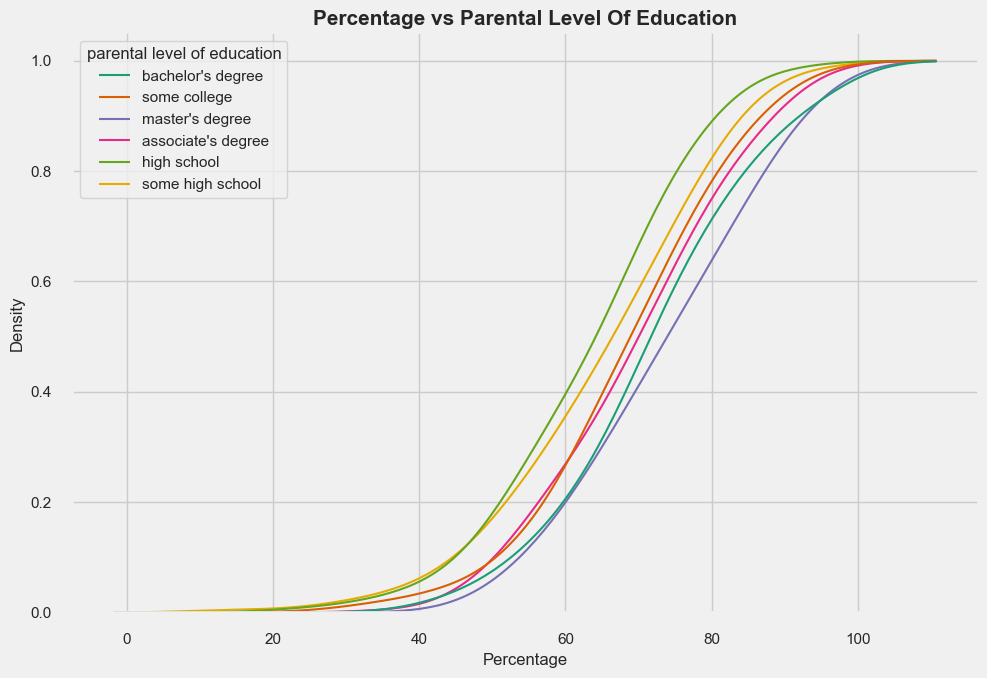

In [223]:
sns.set_palette("Dark2")
sns.set_context("notebook",font_scale=1)
sns.kdeplot(
    data=df, x="Percentage", hue="parental level of education",
    cumulative=True, common_norm=False, common_grid=True,
)
plt.title('Percentage vs Parental Level Of Education',fontsize=15, fontweight='bold')

plt.show()

* Students whose parents hold a master's degree have a higher overall percentage. 
* Students whose parental education level is 'high school' and 'some high school' have lower overall percentage.

### Percentage Distribution w.r.t. Race/ethnicity

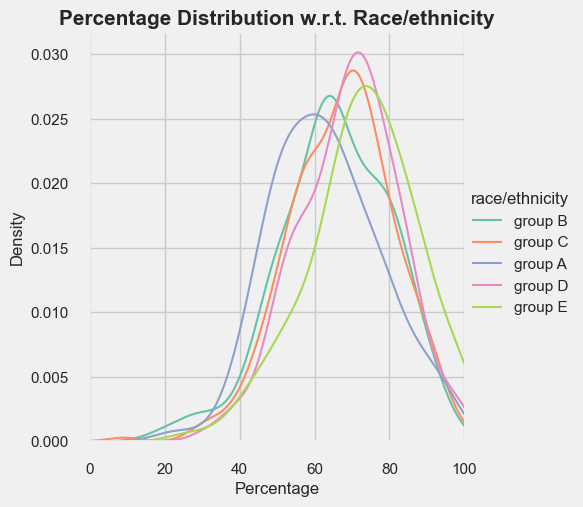

In [224]:
sns.set_palette("Set2")
(sns.FacetGrid(df,hue="race/ethnicity", height=5,xlim = (0,100)).map(sns.kdeplot, "Percentage").add_legend())
plt.title('Percentage Distribution w.r.t. Race/ethnicity',fontsize=15, fontweight='bold')

plt.show()

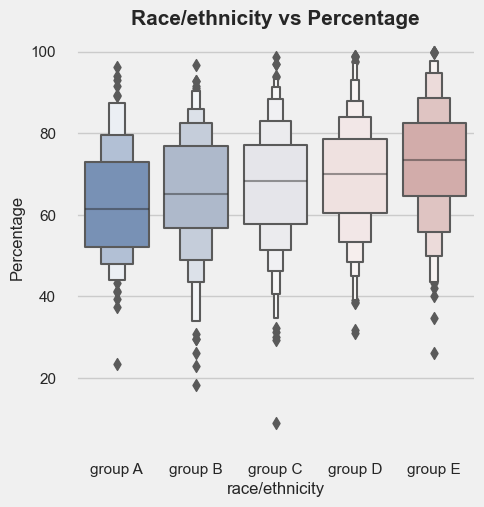

In [225]:
sns.set_palette("vlag")
sns.catplot(x="race/ethnicity", y="Percentage", kind="boxen",
            data=df.sort_values("race/ethnicity"))
plt.title('Race/ethnicity vs Percentage',fontsize=15, fontweight='bold')

plt.show()

The average of group E is highest among all the groups while the average of group A is lowest.

### Race/ethnicity vs Scores

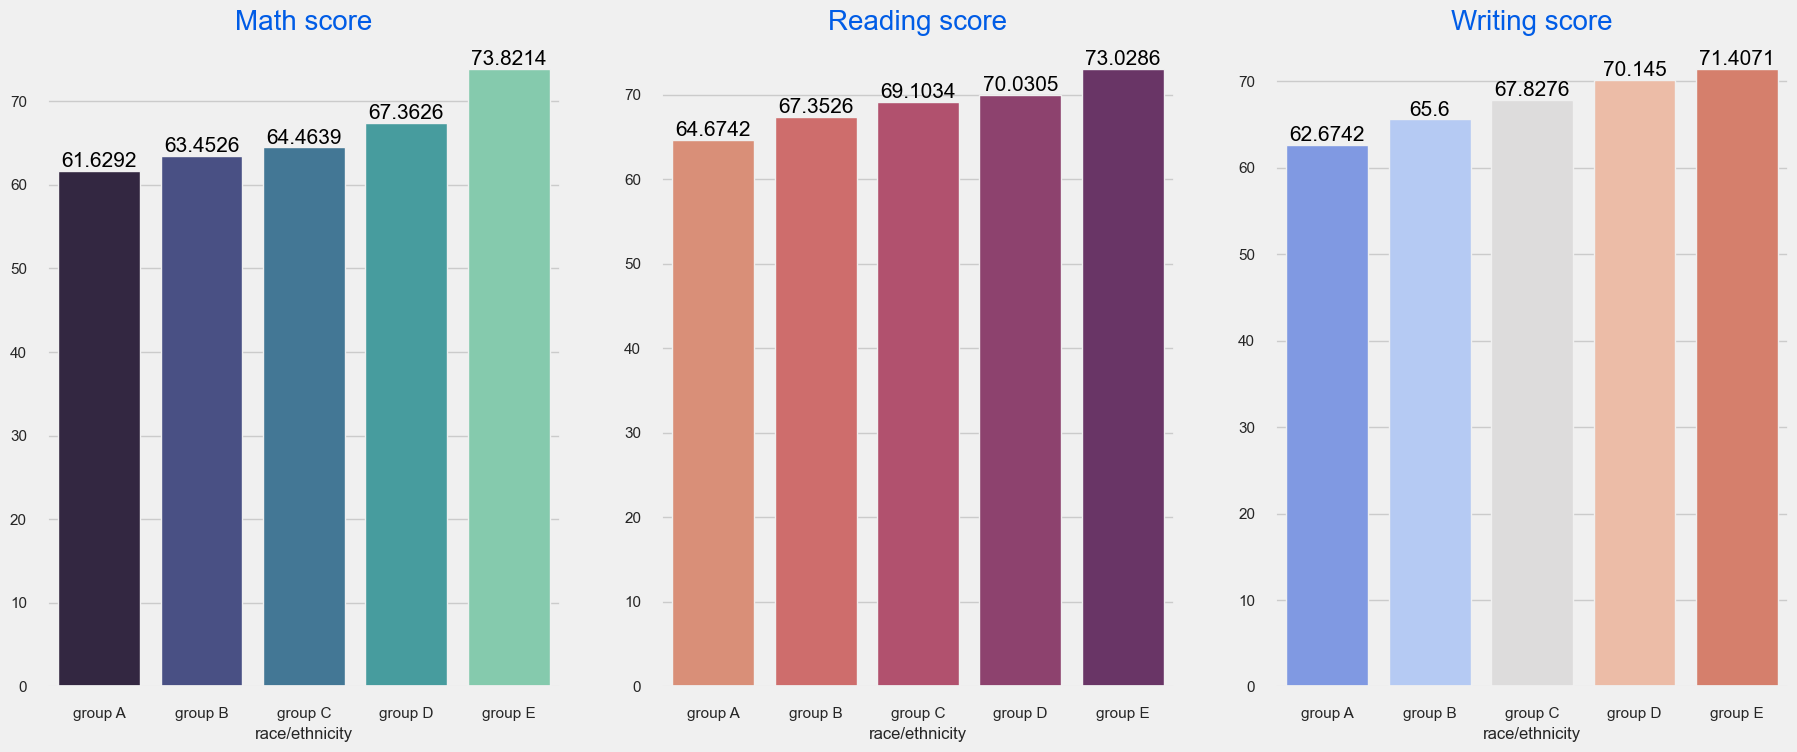

In [227]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects

## Multivariate Analysis

### Comparison of Student Attributes

#### Pair Plot

<Figure size 1200x600 with 0 Axes>

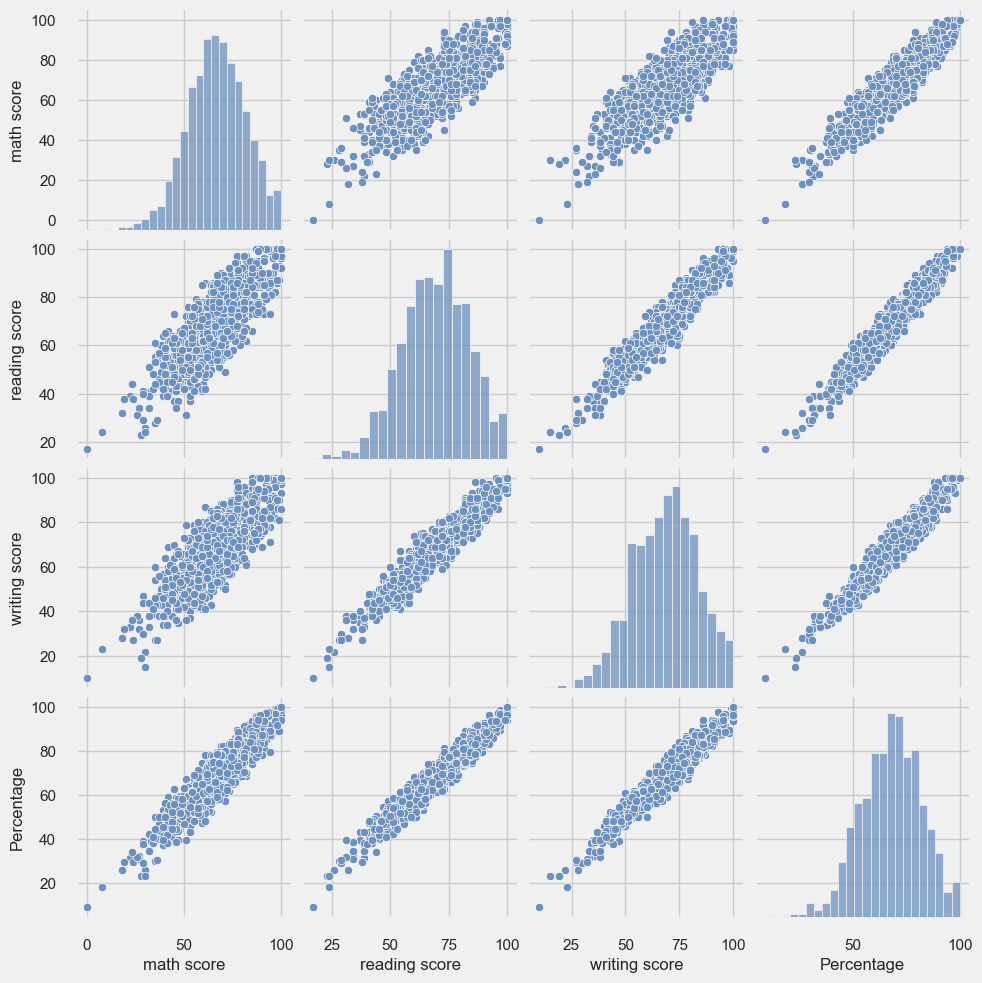

In [228]:
plt.figure(figsize=(12,6))
sns.pairplot(df)
plt.show()

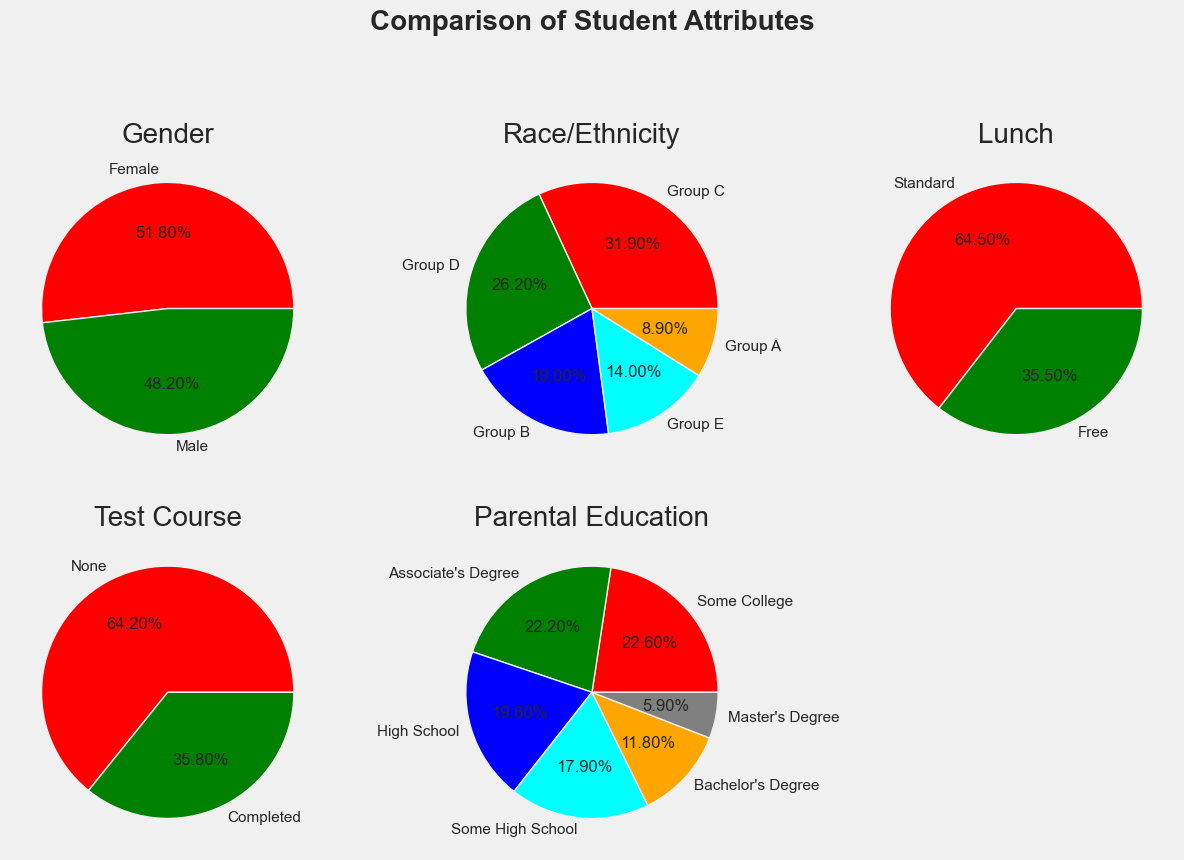

In [231]:
plt.rcParams['figure.figsize'] = (12, 9)

# First row of pie charts
plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
colors = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Second row of pie charts
plt.subplot(2, 3, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

# Remove extra subplot
plt.subplot(2, 3, 6).remove()

# Add super title
plt.suptitle('Comparison of Student Attributes', fontsize=20, fontweight='bold')

# Adjust layout and show plot
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


* The number of Male and Female students is almost equal.
* The number of students is higher in Group C.
*The number of students who have standard lunch is greater.
* The number of students who have not enrolled in any test preparation course is greater.
* The number of students whose parental education is “Some College” is greater followed closely by “Associate’s Degree”.

### Reading and Mathematics score vs Gender

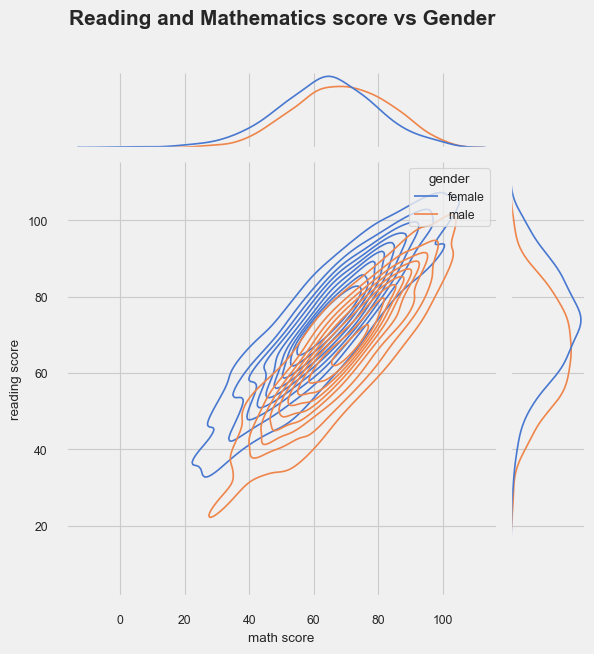

In [232]:
sns.set_context("paper",font_scale=1)
sns.jointplot(data=df, x="math score", y="reading score", hue="gender", kind="kde")
plt.title('Reading and Mathematics score vs Gender', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

* the relationship between reading and mathematical score and their gender distribution.

### Percentage and Mathematics score vs Gender

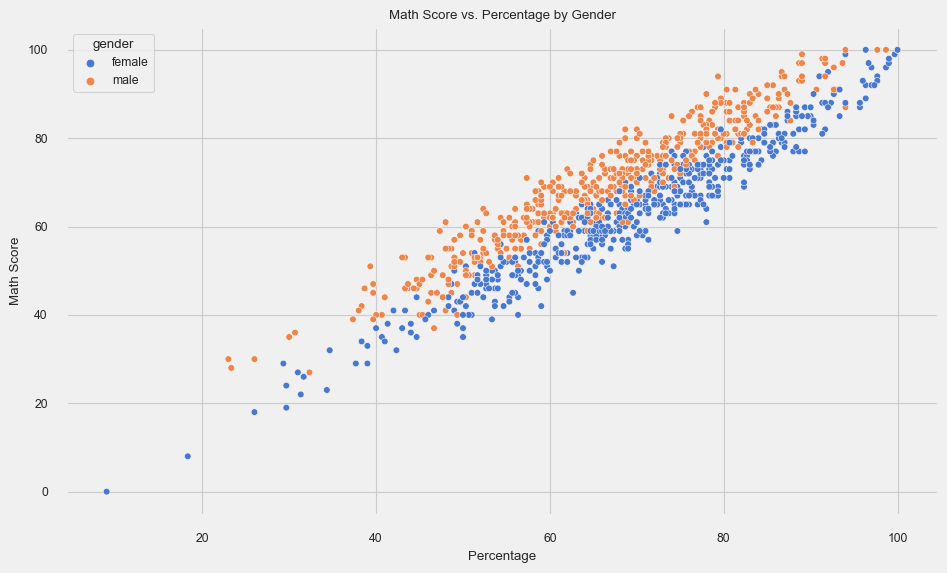

In [233]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Percentage', y='math score', hue='gender', data=df)
plt.title('Math Score vs. Percentage by Gender')
plt.xlabel('Percentage')
plt.ylabel('Math Score')
plt.show()

* Females Performed well

### Percentage and Mathematics score vs Test Preparation

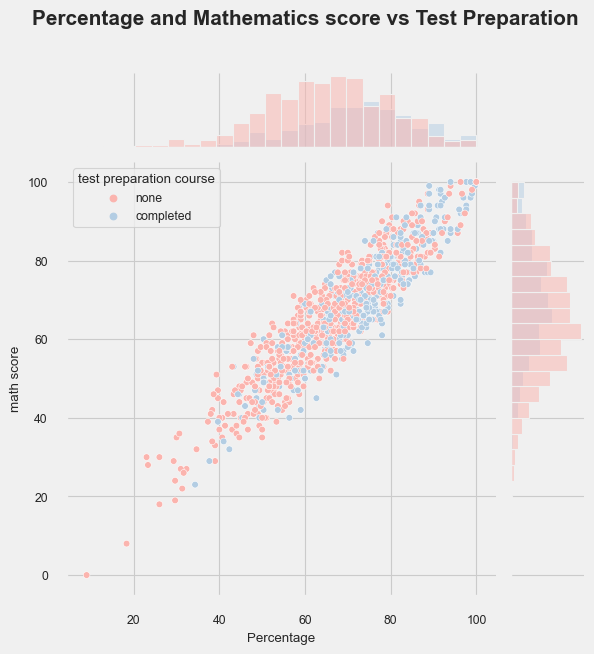

In [234]:
sns.set_palette("Pastel1")
g = sns.JointGrid(data=df, x="Percentage", y="math score", hue="test preparation course")
g.plot(sns.scatterplot, sns.histplot)
plt.title('Percentage and Mathematics score vs Test Preparation ', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

* Students who have completed their test preparations have definitely scored better.
* While a few students who did not complete their test preparations have not performed so well.
* There are few who have scored exceptionally good compared to others even when they did not complete their test perparation.
* There are very few who completed their test preparation but still scored low percentage.

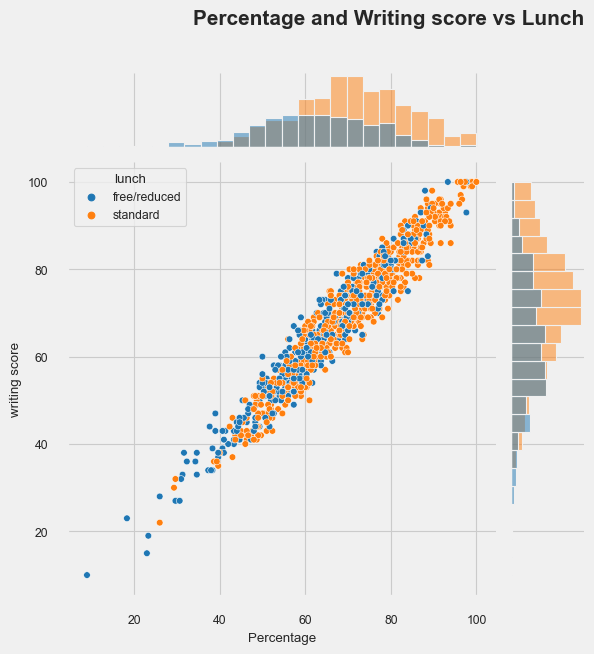

In [235]:
sns.set_palette("tab10")
g = sns.JointGrid(data=df, x="Percentage", y="writing score", hue="lunch")
g.plot(sns.scatterplot, sns.histplot)
plt.title('Percentage and Writing score vs Lunch', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

Food and nutrition play a vital role in the growth of a student both, physically and academically. Nutrition plays a key role in the healthy development of the children. Students are able to learn better when they're well nourished, and eating healthy meals has been linked to higher grades, better memory and alertness, and faster information processing.

* Students who had the standard lunch have performed very well.
* Students who had the free/reduced lunch have not performed so well.

### Percentage & Parental Education Distribution vs Gender

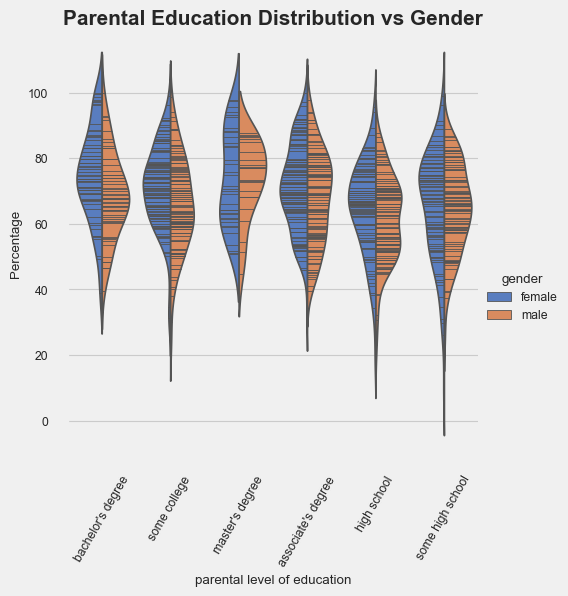

In [236]:
sns.catplot(x="parental level of education", y="Percentage", hue="gender",
            kind="violin", inner="stick", split=True,
            palette="muted", data=df)
plt.title('Parental Education Distribution vs Gender',fontsize=15, fontweight='bold')
plt.xticks(rotation=60)
plt.show()

* Females whose parents hold a Bachelor's degree, followed by master's degree,are more successful.
* Males whose parents hold a Bachelor's degree and master's degree have similar academic performance

### Parental level of education vs Scores

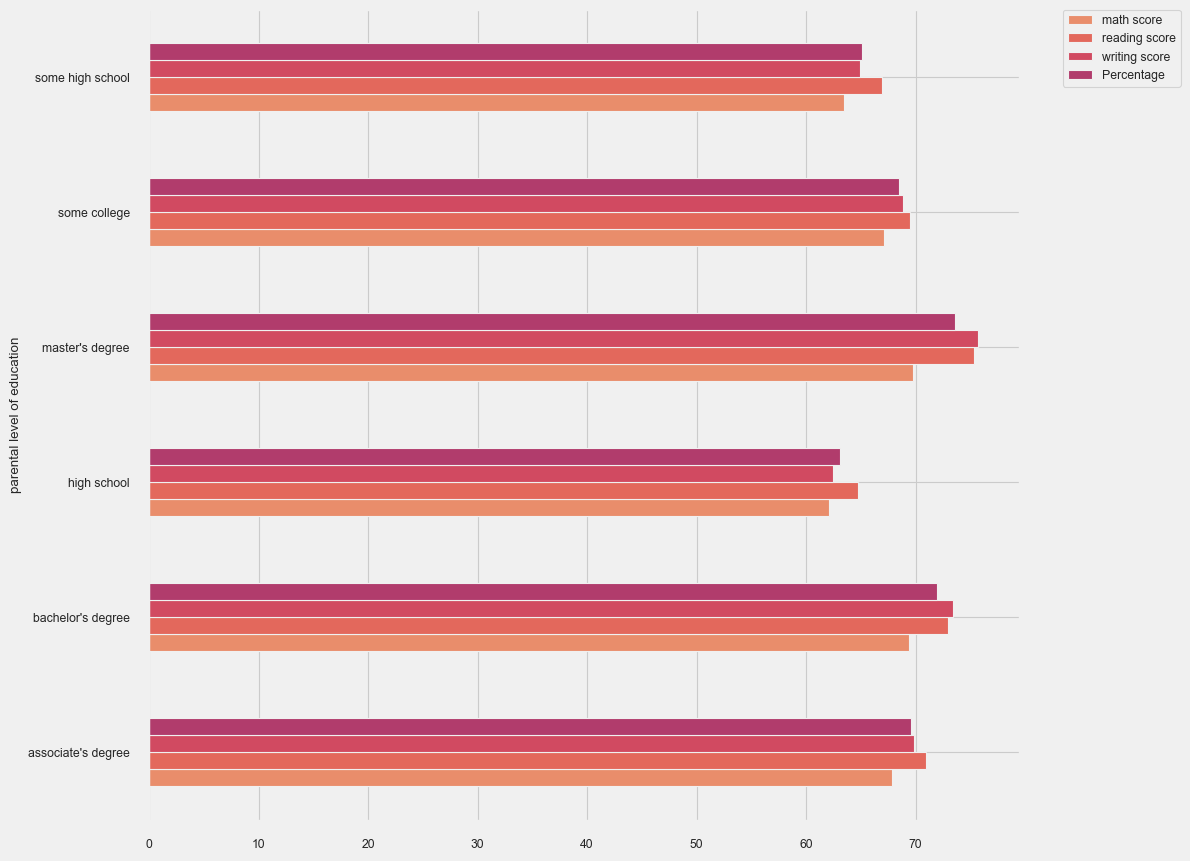

In [237]:
sns.set_palette("flare")
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### Maximum Score of Students in All Three Subjects

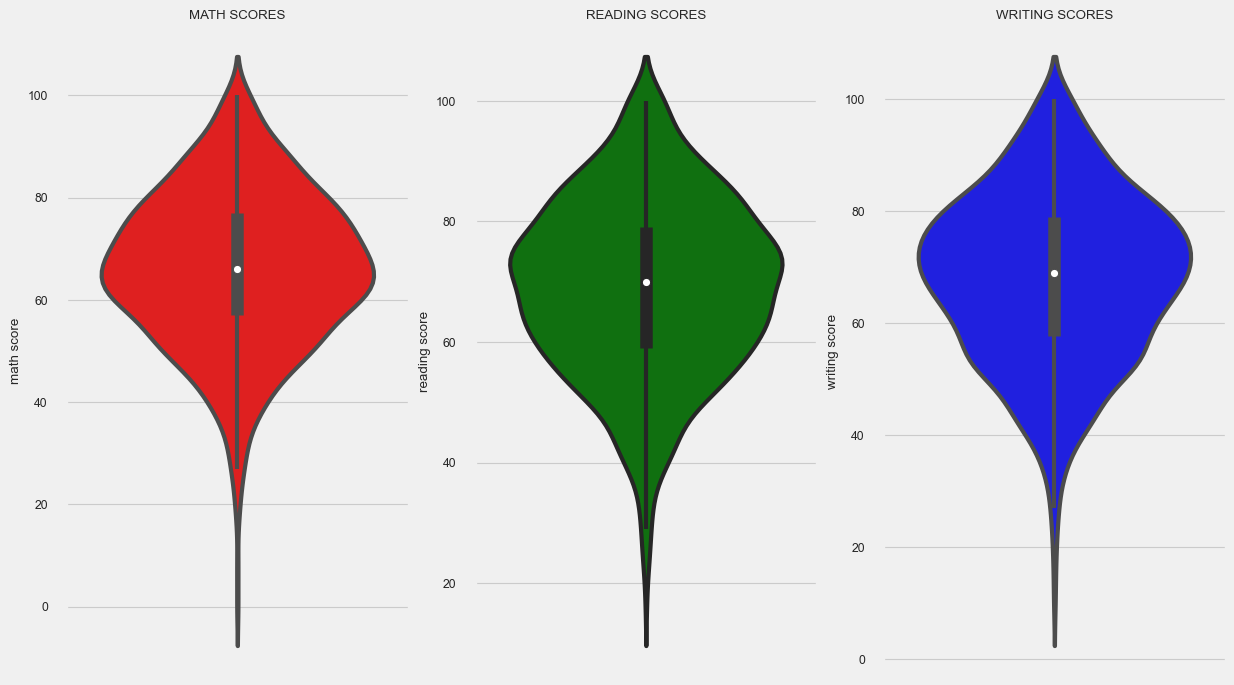

In [238]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)

plt.show()

* most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80.

### Overall Mean Score

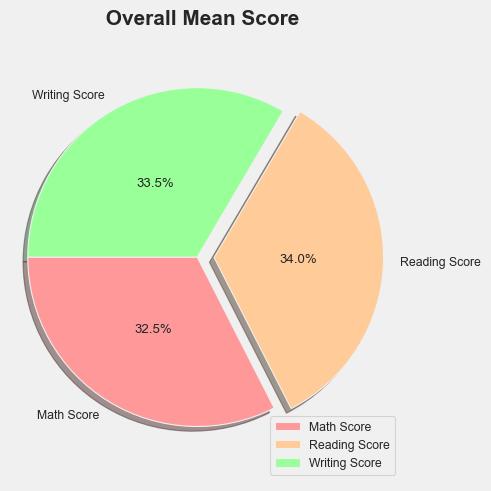

In [239]:
plt.figure(figsize=(5,5))
labels=['Math Score', 'Reading Score', 'Writing Score']
colors=['#ff9999', '#ffcc99', '#99ff99']
explode=[0,0.1,0]
values=[df["math score"].mean(),df["reading score"].mean(),df["writing score"].mean()]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True,startangle=180,pctdistance=0.5)
plt.legend(['Math Score', 'Reading Score', 'Writing Score'],loc='lower right')
plt.axis('equal')
plt.title(' Overall Mean Score  ',fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

* Reading Score has the highest average.

### Correlation

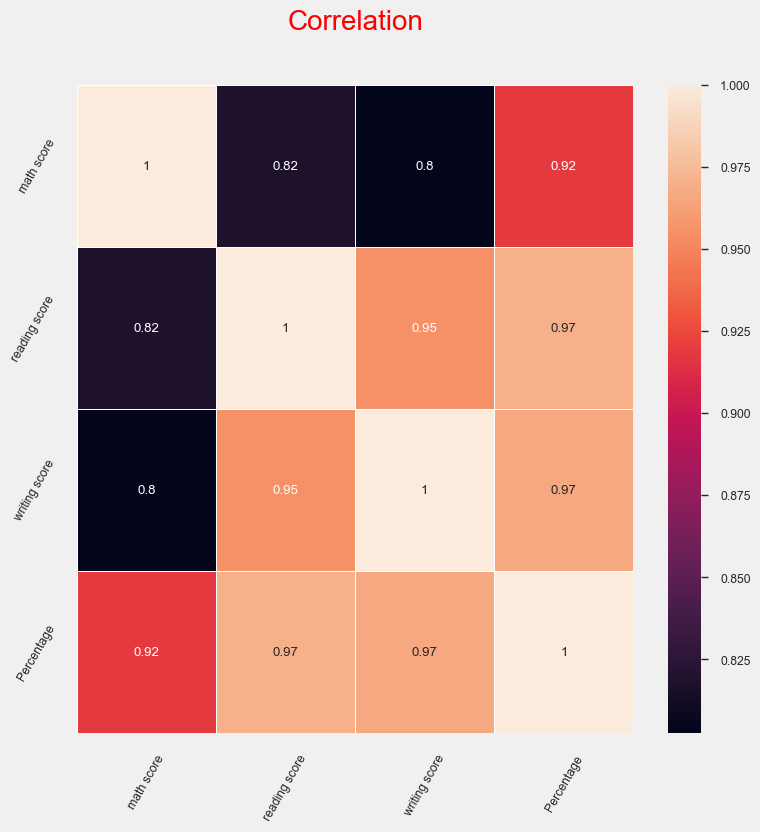

In [240]:
plt.figure(figsize=(8,8))
plt.title('Correlation',color='Red',fontsize=20,pad=40)
corr = df.corr()
sns.heatmap(df.corr(),annot=True,linewidths=.5);
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

* Almost all the scores are close to each other. There is average success in all three course.

## Insights

* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.

## Model Training

## Separation of the dependent variable(y) and independent variables(X)

In [289]:
df1 = df.drop(['Percentage','grade'],axis=1)
df1.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [290]:
X=df1.drop(['math score'],axis=1)
y = df1["math score"] 

In [291]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


### Column Transformer

In [292]:
X.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
reading score                   int64
writing score                   int64
dtype: object

In [293]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [294]:
num_features

Index(['reading score', 'writing score'], dtype='object')

In [295]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

In [296]:
# Create ColumnTransformer
preprocessor = ColumnTransformer([
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
])



In [297]:
X = preprocessor.fit_transform(X)

### Train and Test Splitting

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

## Evaluate different models

In [299]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

## The RMSE, MSE, MAE, and R2 score values for training and test data.

In [300]:
#Different models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3240
- Mean Squared Error: 28.3445
- Mean Absolute Error: 4.2691
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3773
- Mean Squared Error: 5.3773
- Mean Absolute Error: 4.2053
- R2 Score: 0.8812


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Squared Error: 43.4784
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7133
- Mean Squared Error: 32.6412
- Mean Absolute Error: 4.5213
- R2 Score: 0.8552
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2488
- Mean Squared Error: 7.2488
- Mean Absolute Error

##  Hyper Parameter Tuning

In [301]:
param_grid = {
    "Linear Regression": {},
    "Lasso": {"alpha": [1]},
    "K-Neighbors Regressor": {"n_neighbors": [3, 5, 7],},
    "Decision Tree": {"max_depth": [3, 5, 7],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']},
    "Random Forest Regressor": {'n_estimators': [8,16,32,64,128,256], "max_depth": [3, 5, 7]},
    "Gradient Boosting": {'learning_rate':[.1,.01,.05,.001],'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
                          'n_estimators': [8,16,32,64,128,256]},
    "XGBRegressor": {'depth': [6,8,10],'learning_rate': [0.01, 0.05, 0.1],'iterations': [30, 50, 100]},
    "CatBoosting Regressor": {"iterations": [100, 500], "depth": [3, 5, 7]},
    "AdaBoost Regressor": {'learning_rate':[.1,.01,0.5,.001],'n_estimators': [8,16,32,64,128,256]}
}

model_list = []
r2_list =[]

for model_name, model in models.items():
    # Create a scorer object to use in grid search
    scorer = make_scorer(r2_score)

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(
        model, 
        param_grid[model_name], 
        scoring=scorer, 
        cv=5,
        n_jobs=-1
    )
    # Train the model with the best hyperparameters
    grid_search.fit(X_train, y_train) 

    # Make predictions
    y_train_pred = grid_search.predict(X_train)
    y_test_pred = grid_search.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)
    print('Best hyperparameters:', grid_search.best_params_)
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')

Linear Regression
Best hyperparameters: {}
Model performance for Training set
- Root Mean Squared Error: 5.3240
- Mean Squared Error: 28.3445
- Mean Absolute Error: 4.2691
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3773
- Mean Squared Error: 5.3773
- Mean Absolute Error: 4.2053
- R2 Score: 0.8812


Lasso
Best hyperparameters: {'alpha': 1}
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Squared Error: 43.4784
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


K-Neighbors Regressor
Best hyperparameters: {'n_neighbors': 7}
Model performance for Training set
- Root Mean Squared Error: 5.9084
- Mean Squared Error: 34.9087
- Mean Absolute Error: 4.7177
- R2 Score: 0.8452
----------------------------------
Model performa

## Result

In [304]:
df2=pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
df2

,Model Name,R2_Score
0,Linear Regression,0.881171
7,CatBoosting Regressor,0.874602
5,Gradient Boosting,0.872850
4,Random Forest Regressor,0.862786
6,XGBRegressor,0.860795
8,AdaBoost Regressor,0.851221
1,Lasso,0.825320
3,Decision Tree,0.824230
2,K-Neighbors Regressor,0.791377


* Linear regression is chosen as  the final model because that model will get a training set r2 score is 87.43 and a testing set r2 score is 88.11.

In [305]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.12


## Visualisation

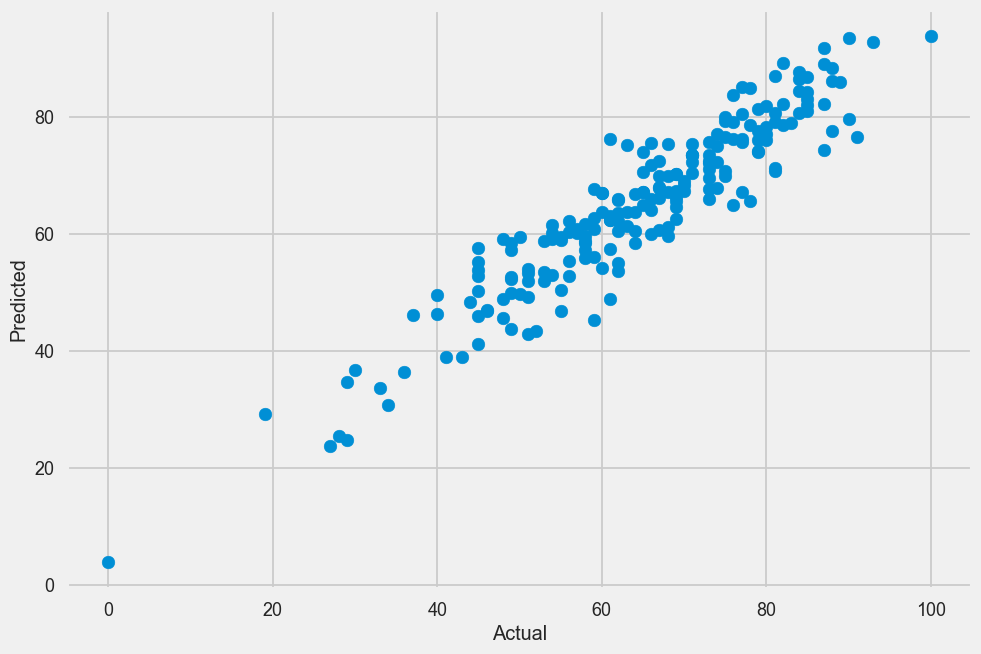

In [306]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<Axes: xlabel='math score'>

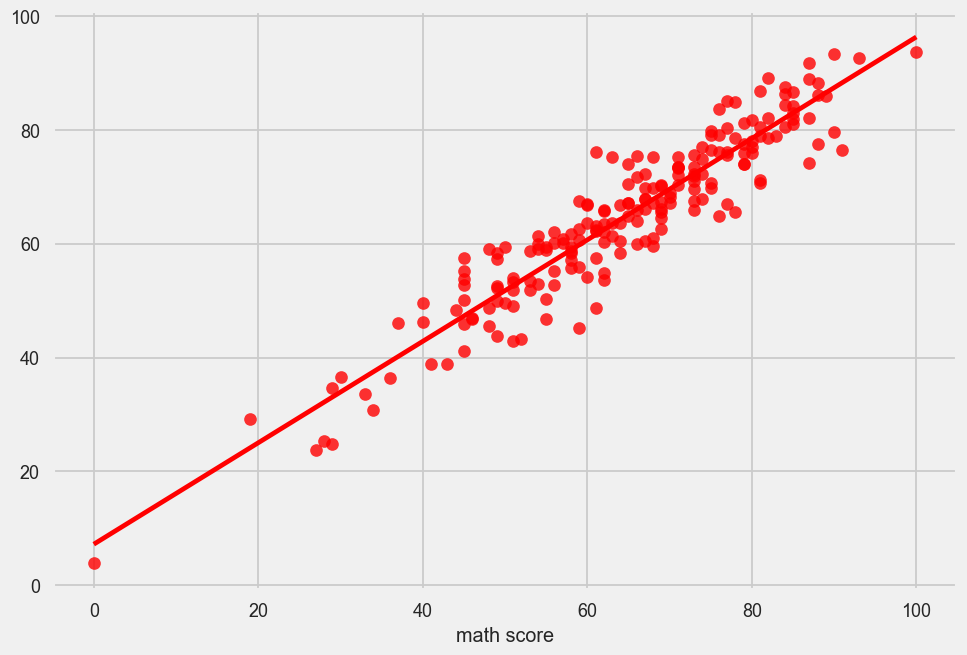

In [307]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

### Difference Between Actual and Predicted Values

In [308]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.796875,-5.796875
740,80,76.976562,3.023438
660,74,76.984375,-2.984375
411,84,87.664062,-3.664062
...,...,...,...
408,52,43.367188,8.632812
332,62,62.156250,-0.156250
208,74,67.812500,6.187500
613,65,67.125000,-2.125000


## Convert the Model to Pickle File

In [309]:
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)